# DCMD Example

In this notebook, we will be using the SpikerTools library to analyze some DCMD data from a session! Let's talk about the data first. This was recorded from one of Backyard Brains' devices using the Spike Recorder app. 

Using the Backyard Brains SpikerBox bioamplifier, the activity of the descending contralateral movement detector (DCMD) neuron was recorded extracellularly from the grasshopper's neck. The DCMD activity underlies the grasshopper's motor responses to looming monocular visual cues.

We would like to determine the distribution of spikes around a certain stimulus.

The goal is to generate a PETH (peri-stimulus or peri-event time histogram) that is described in more detail below. Let's get started!

First, we import spikertools. 

In [4]:
#clone package repo
!git clone https://github.com/BackyardBrains/SpikerTools.git

%cd SpikerTools

!git pull origin master 


!pip install -r requirements.txt

#install package
#!python setup.py install

from SpikerTools import spikertools as sp

Cloning into 'SpikerTools'...
Updating files:  23% (19/80)
Updating files:  25% (20/80)
Updating files:  26% (21/80)
Updating files:  27% (22/80)
Updating files:  28% (23/80)
Updating files:  30% (24/80)
Updating files:  31% (25/80)
Updating files:  32% (26/80)
Updating files:  33% (27/80)
Updating files:  35% (28/80)
Updating files:  36% (29/80)
Updating files:  37% (30/80)
Updating files:  38% (31/80)
Updating files:  40% (32/80)
Updating files:  41% (33/80)
Updating files:  42% (34/80)
Updating files:  43% (35/80)
Updating files:  45% (36/80)
Updating files:  46% (37/80)
Updating files:  47% (38/80)
Updating files:  48% (39/80)
Updating files:  50% (40/80)
Updating files:  51% (41/80)
Updating files:  52% (42/80)
Updating files:  53% (43/80)
Updating files:  55% (44/80)
Updating files:  56% (45/80)
Updating files:  57% (46/80)
Updating files:  58% (47/80)
Updating files:  60% (48/80)
Updating files:  61% (49/80)
Updating files:  62% (50/80)
Updating files:  63% (51/80)
Updating file

  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\USER\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\matplotlib\\_c_internal_utils.cp39-win_amd64.pyd'
Check the permissions.

You should consider upgrading via the 'C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


ImportError: cannot import name 'artist' from 'matplotlib' (C:\Users\USER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\matplotlib\__init__.py)

Next, we create a Session object using our data file! Just add the path to the filename in the Session() initializer as shown below. 

Since we will be manually adding events, add a second blank argument "" to indicate that there are no events specified.

A Session object stores the data and associated events, and allows you to perform various preprocessing functions (filtering, downsamplling, etc.) and make various plots!

In [6]:
dcmd = sp.Session()

Empty Session object created


Now, we need to add our events manually! 
We have two types of events: stimulus onset events and spike events.
Both can be extracted from the associated json file! 
Let's take a look using the code below!

In [3]:
import json
with open("dcmd_example_data\G27-072516-03\G27-072516-03.json") as f:
    data = json.load(f)
    trials = data["trials"]
    onsets = []
    spikes = []
    i=0
    for trial in trials:
        onset = trial["timeOfImpact"] + 10*i
        spike_data = trial["spikeTimestamps"]
        for spike in spike_data:
            spikes.append(spike + 10*i)
        i=i+1
        onsets.append(onset)
    





Now let's add the events to our session object!

In [7]:
events = {}
events["onsets"] = onsets
events["spikes"] = spikes
dcmd.set_events(events)

{'onsets': [3.70269,
  13.702511,
  23.701529999999998,
  33.70557,
  43.704403,
  53.703651,
  63.702621,
  73.701908,
  83.702118,
  93.702847,
  103.702419,
  113.702148,
  123.702309,
  133.704468,
  143.702641,
  153.702148,
  163.702702,
  173.701847,
  183.704102,
  193.70269],
 'spikes': [0.440839,
  3.498413,
  3.611361,
  3.637029,
  3.72356,
  5.326984,
  10.838163,
  13.502494,
  13.623628,
  13.725556000000001,
  13.947982,
  13.986553,
  14.514671,
  14.669364999999999,
  14.881361,
  20.086417,
  20.576599,
  20.747846,
  20.998367000000002,
  23.633129,
  24.520023000000002,
  24.621837,
  24.627890999999998,
  24.642108999999998,
  24.660816,
  24.67034,
  24.743129,
  24.753356,
  24.951406,
  25.020045,
  31.605601,
  32.346304,
  33.656213,
  33.66678,
  33.689773,
  33.711701,
  33.75771,
  33.9661,
  34.069705,
  34.080136,
  34.132653,
  34.170794,
  34.226122000000004,
  34.268775,
  34.329388,
  34.450386,
  34.567052000000004,
  34.691066,
  35.022767,
  35.03

Now we can finally call our PETH function! 

Peri Event Time Histograms or PETHs allow the visualization of the rate of spikes and when they occur around a particular event. These histograms are used to visualize the rate and timing of neuronal spike discharges in relation to an external stimulus or event. 

the plot_peth function takes the following arguments:
channel index, in our case, we are working with Channel 0
time bounds, we would like to consider the spikes occuring 1.5 seconds before and after stimulus onset, so we set it as (-1.5, 1.5)
stimulus onset event, here it is labelled as "onsets"
spike time event, here it is labelled as "spikes"
number of bins for histogram, here we set it to 50 bins. 

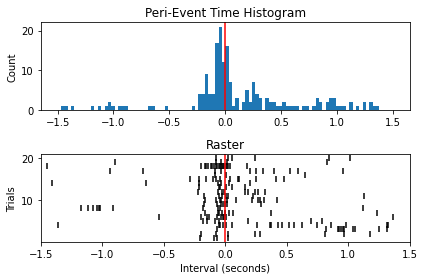

In [10]:
dcmd.plot_peth(0,(-1.5,1.5),"onsets", "spikes", 100)

We can see that most events are concentrated about the stimulus! 